In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


     batting_team      bowling_team       city  runs_left  balls_left  \
0  Gujarat Titans  Rajasthan Royals  Ahmedabad        131         125   
1  Gujarat Titans  Rajasthan Royals  Ahmedabad        131         124   
2  Gujarat Titans  Rajasthan Royals  Ahmedabad        126         119   
3  Gujarat Titans  Rajasthan Royals  Ahmedabad        122         118   
4  Gujarat Titans  Rajasthan Royals  Ahmedabad        122         117   

   wickets_remaining  total_run_x   crr   rrr  results  
0                 10          131   0.0  6.29        1  
1                 10          131   0.0  6.34        1  
2                 10          131  30.0  6.35        1  
3                 10          131  27.0  6.20        1  
4                 10          131  18.0  6.26        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96278 entries, 0 to 96277
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   batting_t

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1926/1926 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7863 - loss: 0.4345 - val_accuracy: 0.8978 - val_loss: 0.2341
Epoch 2/10
1926/1926 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8906 - loss: 0.2531 - val_accuracy: 0.9315 - val_loss: 0.1553
Epoch 3/10
1926/1926 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9159 - loss: 0.1939 - val_accuracy: 0.9487 - val_loss: 0.1181
Epoch 4/10
1926/1926 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9273 - loss: 0.1636 - val_accuracy: 0.9554 - val_loss: 0.1016
Epoch 5/10
1926/1926 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9389 - loss: 0.1400 - val_accuracy: 0.9590 - val_loss: 0.0919
Epoch 6/10
1926/1926 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9411 - loss: 0.1342 - val_accuracy: 0.9648 - val_loss: 0.0794
Epoch 7/10
1926/1926 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9488 - loss: 0.1156 - val_accuracy: 0.9652 - val_loss: 0.0788
Epoch 8/10
1926/1926 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9526 - loss: 0.1106 - val_accura

Neural Network Accuracy: 0.9747

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     10223
           1       0.95      0.99      0.97      9033

    accuracy                           0.97     19256
   macro avg       0.97      0.98      0.97     19256
weighted avg       0.98      0.97      0.97     19256


Building Random Forest Model...
Random Forest Accuracy: 0.9983

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10223
           1       1.00      1.00      1.00      9033

    accuracy                           1.00     19256
   macro avg       1.00      1.00      1.00     19256
weighted avg       1.00      1.00      1.00     19256


Building XGBoost Model...
XGBoost Accuracy: 0.9054

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     10223
           1     

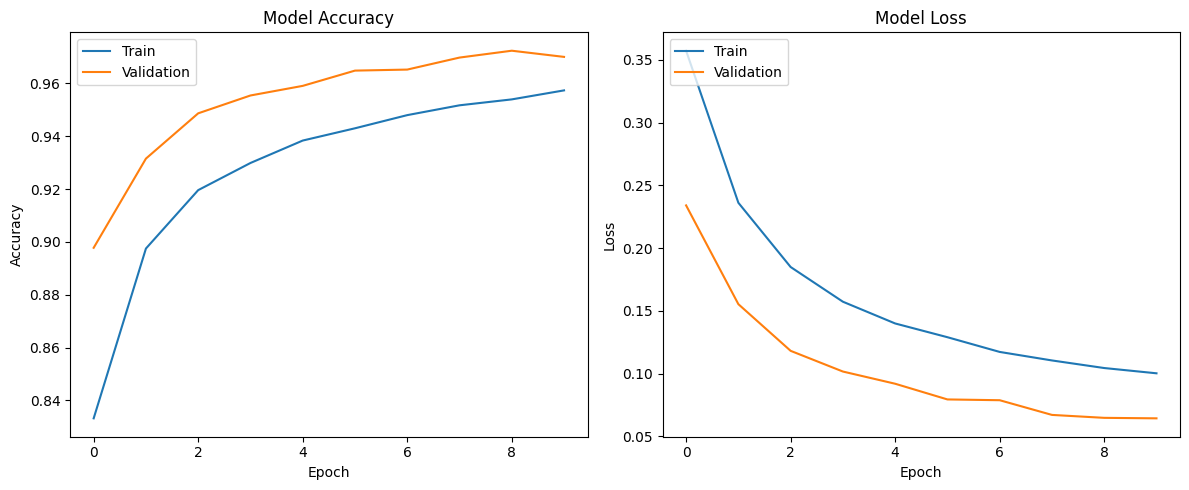

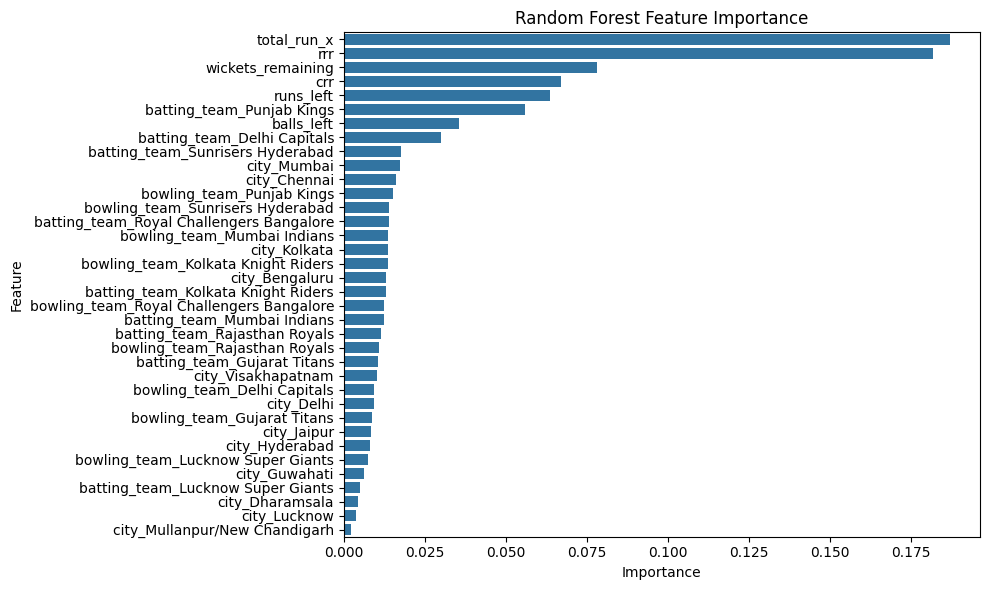

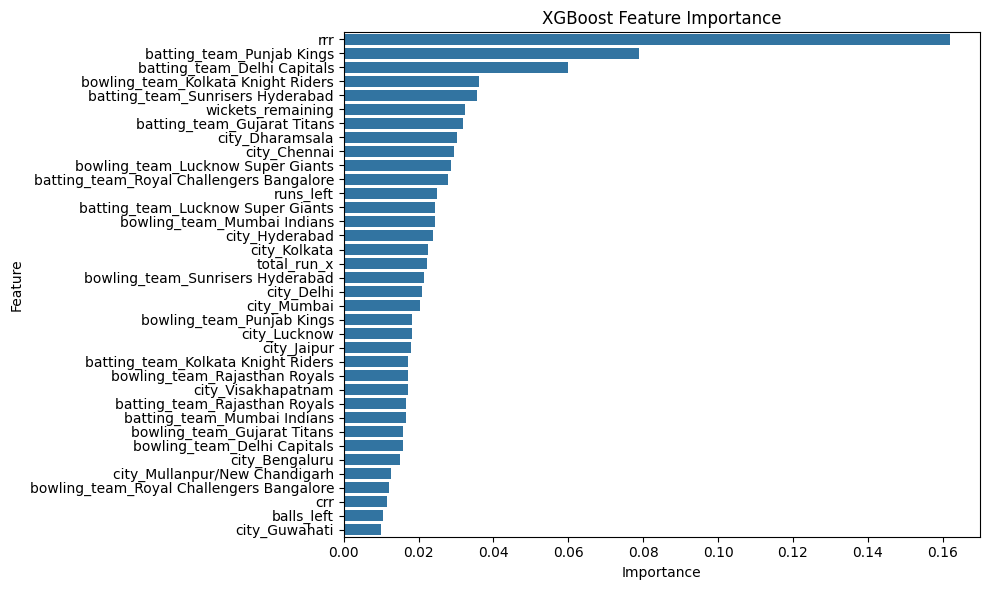

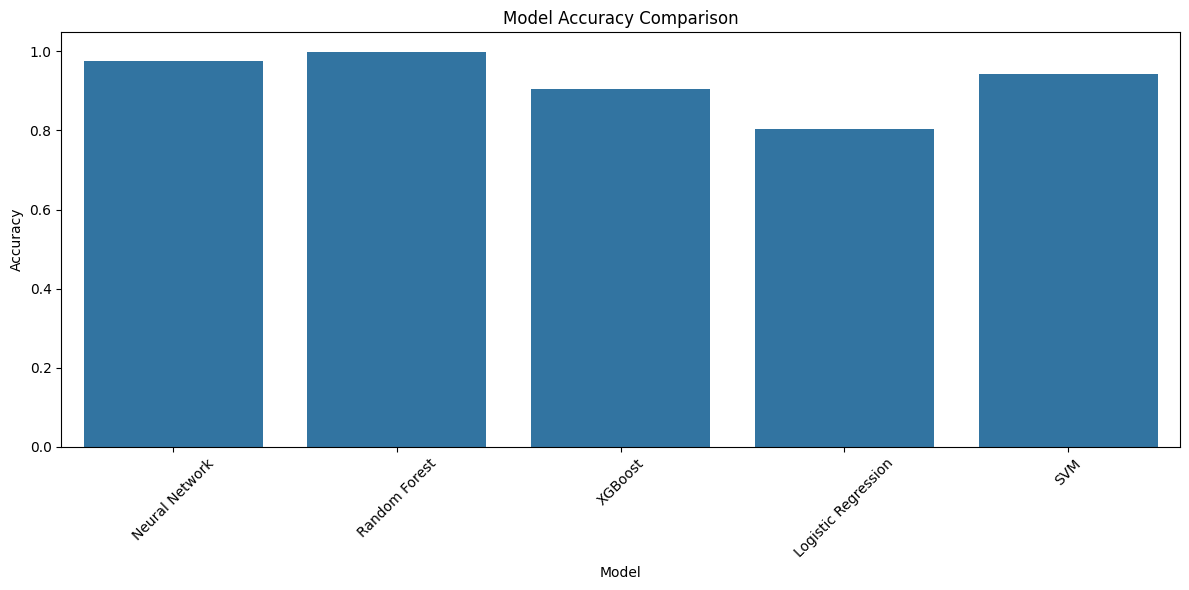

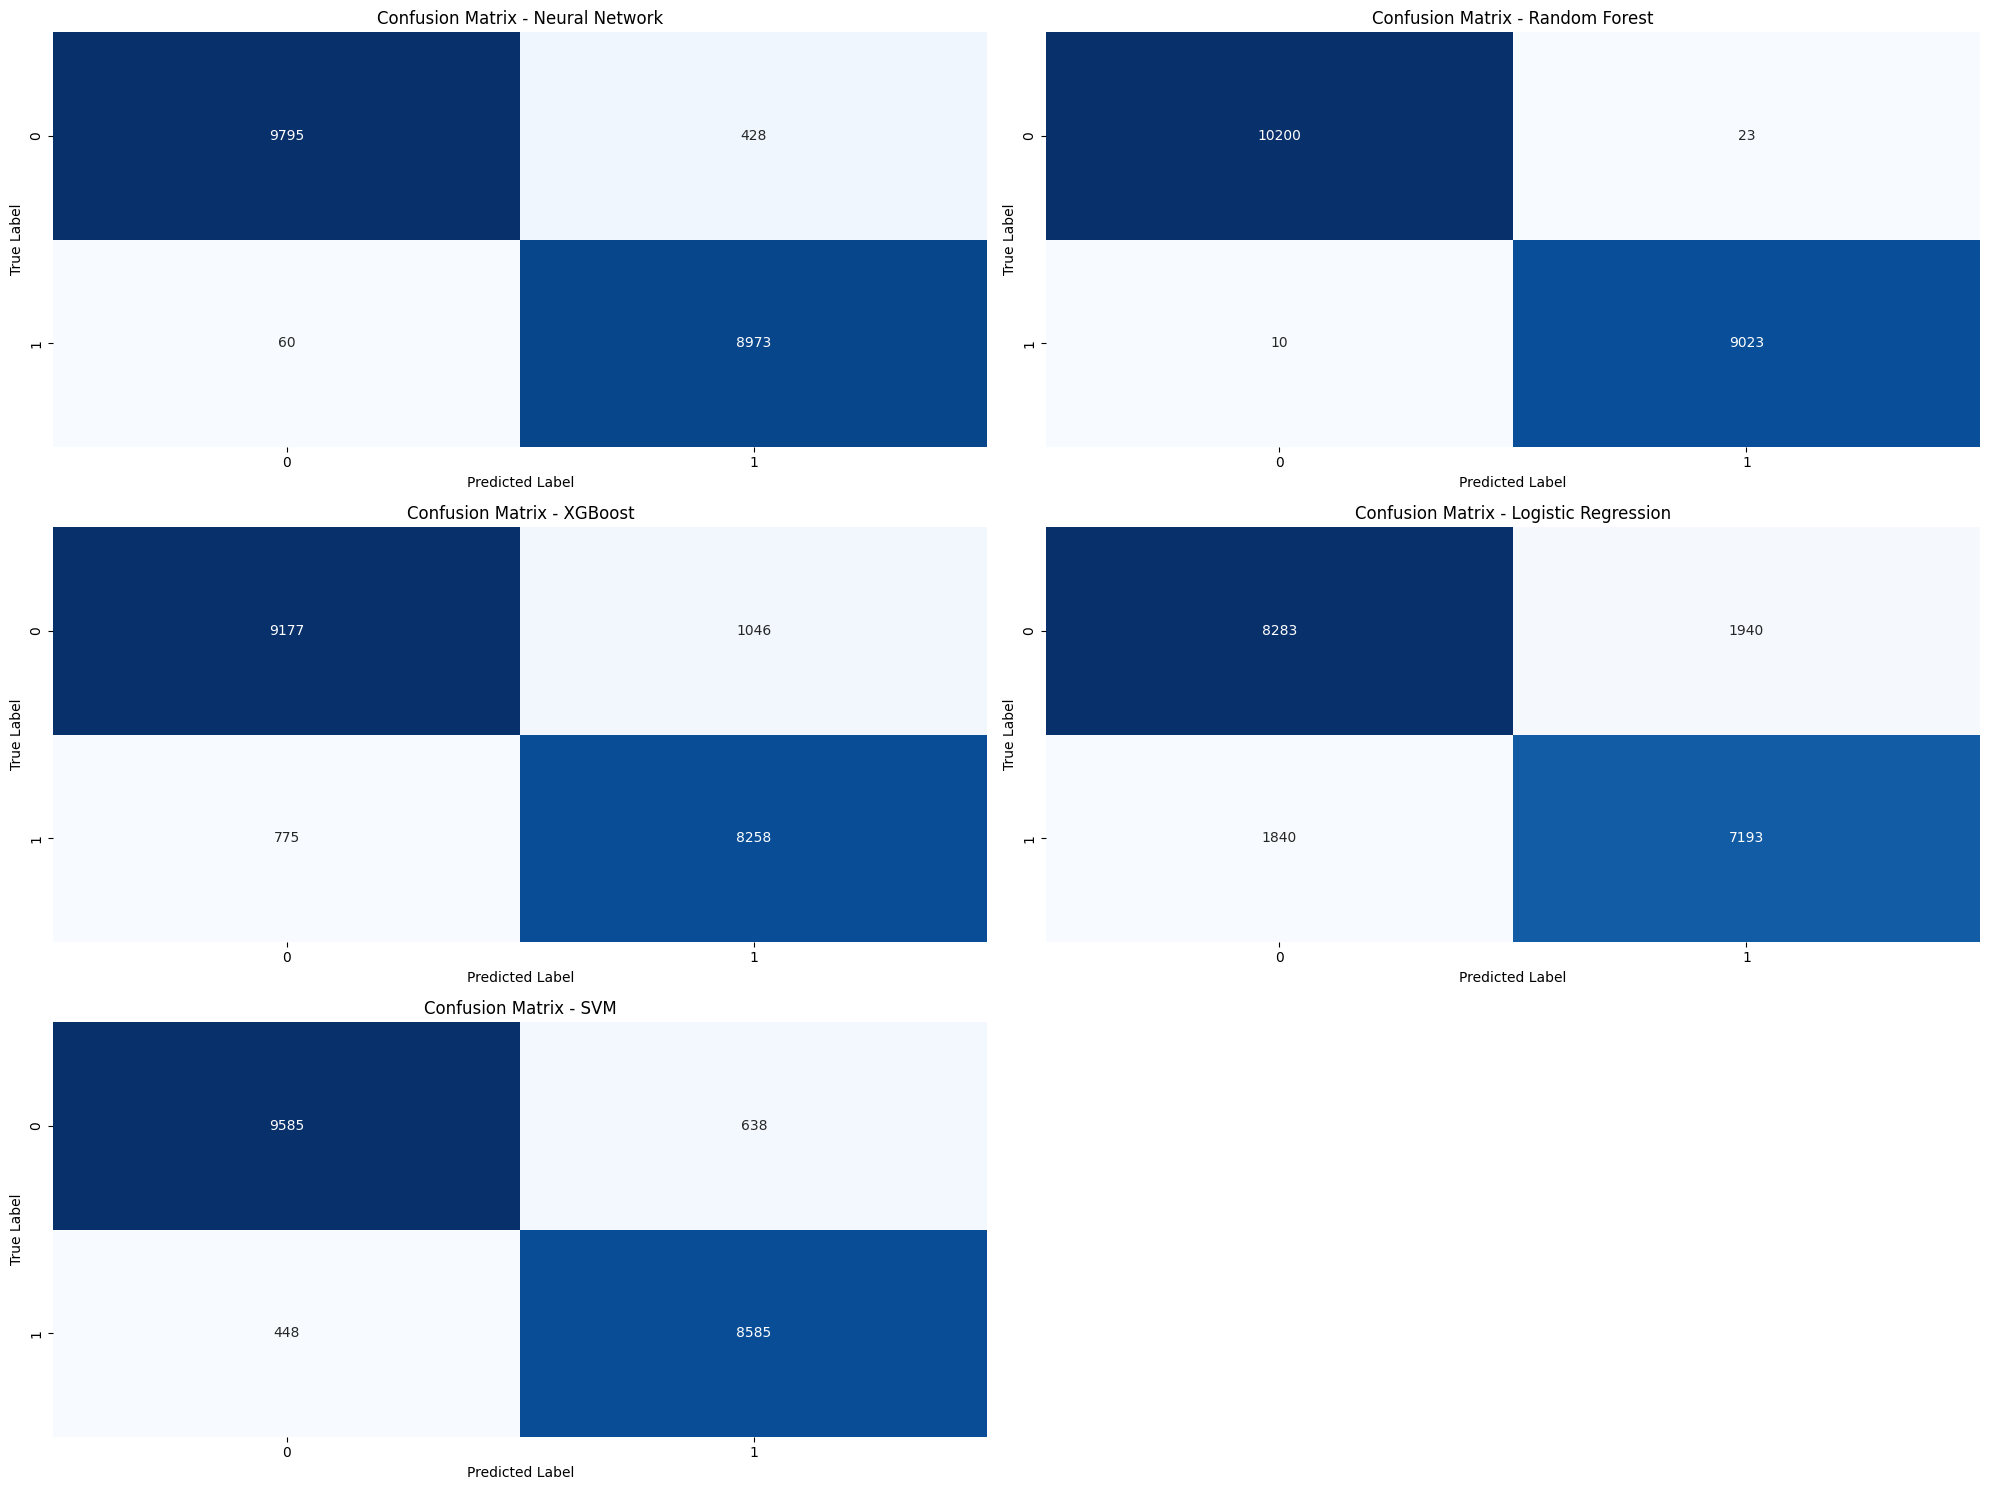

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pickle
import joblib

# Load the preprocessed data
df = pd.read_csv('/content/drive/MyDrive/ipl_data_processed.csv')

# Display basic information about the dataset
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Define features and target variable
X = df[['runs_left', 'balls_left', 'wickets_remaining', 'total_run_x', 'crr', 'rrr']]
y = df['results']

# Convert categorical variables to numerical using one-hot encoding if needed
# Assuming batting_team, bowling_team, and city are categorical
categorical_cols = ['batting_team', 'bowling_team', 'city']
if all(col in df.columns for col in categorical_cols):
    X_with_categorical = pd.get_dummies(df[X.columns.tolist() + categorical_cols], columns=categorical_cols, drop_first=True)
    X = X_with_categorical

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for future use
joblib.dump(scaler, 'scaler.joblib')

# List to store models and their accuracies
models = {}
accuracies = {}

# 1. Neural Network (Deep Learning)
def build_neural_network_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    history = model.fit(
        X_train_scaled, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.savefig('nn_training_history.png')

    # Evaluate the model
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Neural Network Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Save the model
    model.save('neural_network_model.h5')

    return model, accuracy, y_pred

# 2. Random Forest
def build_random_forest_model():
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)

    y_pred = rf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Random Forest Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Random Forest Feature Importance')
    plt.tight_layout()
    plt.savefig('rf_feature_importance.png')

    # Save the model
    with open('random_forest_model.pkl', 'wb') as file:
        pickle.dump(rf, file)

    return rf, accuracy, y_pred

# 3. XGBoost
def build_xgboost_model():
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )

    xgb_model.fit(X_train_scaled, y_train)

    y_pred = xgb_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"XGBoost Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': xgb_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('XGBoost Feature Importance')
    plt.tight_layout()
    plt.savefig('xgb_feature_importance.png')

    # Save the model
    with open('xgboost_model.pkl', 'wb') as file:
        pickle.dump(xgb_model, file)

    return xgb_model, accuracy, y_pred

# 4. Logistic Regression
def build_logistic_regression_model():
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X_train_scaled, y_train)

    y_pred = lr.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Logistic Regression Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Save the model
    with open('logistic_regression_model.pkl', 'wb') as file:
        pickle.dump(lr, file)

    return lr, accuracy, y_pred

# 5. Support Vector Machine
def build_svm_model():
    svm = SVC(kernel='rbf', probability=True, random_state=42)
    svm.fit(X_train_scaled, y_train)

    y_pred = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"SVM Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Save the model
    with open('svm_model.pkl', 'wb') as file:
        pickle.dump(svm, file)

    return svm, accuracy, y_pred

# Build and evaluate all models
print("Building Neural Network Model...")
nn_model, nn_accuracy, nn_pred = build_neural_network_model()
models['Neural Network'] = nn_model
accuracies['Neural Network'] = nn_accuracy

print("\nBuilding Random Forest Model...")
rf_model, rf_accuracy, rf_pred = build_random_forest_model()
models['Random Forest'] = rf_model
accuracies['Random Forest'] = rf_accuracy

print("\nBuilding XGBoost Model...")
xgb_model, xgb_accuracy, xgb_pred = build_xgboost_model()
models['XGBoost'] = xgb_model
accuracies['XGBoost'] = xgb_accuracy

print("\nBuilding Logistic Regression Model...")
lr_model, lr_accuracy, lr_pred = build_logistic_regression_model()
models['Logistic Regression'] = lr_model
accuracies['Logistic Regression'] = lr_accuracy

print("\nBuilding SVM Model...")
svm_model, svm_accuracy, svm_pred = build_svm_model()
models['SVM'] = svm_model
accuracies['SVM'] = svm_accuracy

# Compare model performances
print("\nModel Accuracies Summary:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# Plot model comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_comparison.png')

# Create a confusion matrix for each model
predictions = {
    'Neural Network': nn_pred,
    'Random Forest': rf_pred,
    'XGBoost': xgb_pred,
    'Logistic Regression': lr_pred,
    'SVM': svm_pred
}

plt.figure(figsize=(20, 15))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(3, 2, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('confusion_matrices.png')

print("\nAll models have been trained, evaluated, and saved.")

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pickle
import joblib
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from IPython.display import display, HTML

# Apply basic CSS styling for Colab
def apply_css():
    display(HTML("""
    <style>
        .main-header { color: #0066cc; text-align: center; font-size: 32px; font-weight: bold; margin-bottom: 20px; }
        .sub-header { color: #0066cc; font-size: 20px; font-weight: bold; margin: 20px 0 10px; }
        .prediction-box { background-color: #e6f0ff; border-radius: 10px; padding: 15px; margin: 10px 0; }
        .prediction-result { font-size: 20px; font-weight: bold; color: #006600; text-align: center; }
    </style>
    """))

# Load models efficiently
def load_models():
    models = {}
    accuracies = {}
    scaler = None

    try:
        uploaded = files.upload()  # Upload all model files here
        for filename in uploaded.keys():
            if filename == 'neural_network_model.h5':
                models['Neural Network'] = load_model(filename)
            elif filename == 'random_forest_model.pkl':
                models['Random Forest'] = joblib.load(filename)
            elif filename == 'xgboost_model.pkl':
                models['XGBoost'] = joblib.load(filename)
            elif filename == 'logistic_regression_model.pkl':
                models['Logistic Regression'] = joblib.load(filename)
            elif filename == 'svm_model.pkl':
                models['SVM'] = joblib.load(filename)
            elif filename == 'scaler.joblib':
                scaler = joblib.load(filename)
    except Exception as e:
        print(f"Error loading models: {e}")

    if not scaler:
        print("Scaler not found. Please upload scaler.joblib")
    if not models:
        print("No models loaded. Please upload model files.")

    return models, accuracies, scaler

# Update accuracies (mock values if file not present)
def update_accuracies():
    try:
        uploaded = files.upload()  # Upload model_accuracies.csv if available
        if 'model_accuracies.csv' in uploaded:
            accuracies_df = pd.read_csv('model_accuracies.csv')
            return dict(zip(accuracies_df['Model'], accuracies_df['Accuracy']))
    except:
        pass
    return {
        'Neural Network': 0.85,
        'Random Forest': 0.87,
        'XGBoost': 0.88,
        'Logistic Regression': 0.82,
        'SVM': 0.84
    }

# Prediction function
def predict_winner(model_name, input_data, models, scaler):
    model = models.get(model_name)
    if not model or not scaler:
        return "Model or scaler not loaded", 0

    input_scaled = scaler.transform(input_data)

    if model_name == 'Neural Network':
        prediction_prob = model.predict(input_scaled, verbose=0)[0][0]
        prediction = 1 if prediction_prob > 0.5 else 0
    else:
        prediction = model.predict(input_scaled)[0]
        prediction_prob = model.predict_proba(input_scaled)[0][1] if hasattr(model, 'predict_proba') else 0.5

    return prediction, prediction_prob

# Main application
def main():
    apply_css()

    # Header
    display(HTML('<h1 class="main-header">IPL Match Winner Predictor</h1>'))
    print("Predict IPL match winners based on current match situation.")

    # Load models
    models, accuracies, scaler = load_models()
    if not models or not scaler:
        print("Please upload all required model files and scaler.joblib to proceed.")
        return

    accuracies.update(update_accuracies())

    # Match situation inputs
    display(HTML('<h2 class="sub-header">Match Situation</h2>'))
    runs_left = float(input("Runs Left (0-300): ") or 100)
    balls_left = float(input("Balls Left (0-120): ") or 60)
    wickets_remaining = int(input("Wickets Remaining (0-10): ") or 7)
    total_run_x = float(input("Target Score (0-300): ") or 180)

    current_score = total_run_x - runs_left
    overs_completed = 20 - (balls_left / 6)
    crr = current_score / overs_completed if overs_completed > 0 else 0
    rrr = (runs_left * 6) / balls_left if balls_left > 0 else 0

    print(f"\nCurrent Run Rate: {crr:.2f}")
    print(f"Required Run Rate: {rrr:.2f}")

    # Model selection
    display(HTML('<h2 class="sub-header">Select Prediction Model</h2>'))
    model_options = list(models.keys())
    print(f"Available models: {model_options}")
    selected_model = input(f"Choose a model {model_options}: ") or model_options[0]
    if selected_model not in models:
        print(f"Invalid model. Using {model_options[0]} instead.")
        selected_model = model_options[0]

    # Make prediction
    input_data = pd.DataFrame([[runs_left, balls_left, wickets_remaining, total_run_x, crr, rrr]],
                            columns=['runs_left', 'balls_left', 'wickets_remaining', 'total_run_x', 'crr', 'rrr'])

    prediction, probability = predict_winner(selected_model, input_data, models, scaler)

    # Display prediction
    display(HTML('<div class="prediction-box">'))
    if isinstance(prediction, str):  # Error case
        print(prediction)
    elif prediction == 1:
        display(HTML(f'<p class="prediction-result">Batting team wins with {probability*100:.2f}% probability</p>'))
    else:
        display(HTML(f'<p class="prediction-result">Bowling team wins with {(1-probability)*100:.2f}% probability</p>'))

    print(f"Match Summary:")
    print(f"- Target: {total_run_x}")
    print(f"- Current Score: {current_score}/{10-wickets_remaining}")
    print(f"- Overs: {20-overs_completed:.1f}/20")
    print(f"- Required: {runs_left} runs from {balls_left} balls")
    display(HTML('</div>'))

    # Model comparison
    display(HTML('<h2 class="sub-header">Model Comparison</h2>'))
    accuracy_df = pd.DataFrame({
        'Model': list(accuracies.keys()),
        'Accuracy': list(accuracies.values())
    })
    print(accuracy_df.to_string(index=False))

    plt.figure(figsize=(10, 6))
    bars = sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
    for i, bar in enumerate(bars.patches):
        bars.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{accuracies[accuracy_df.iloc[i]["Model"]]:.4f}',
                 ha='center', va='bottom')
    plt.title('Model Accuracy Comparison')
    plt.xticks(rotation=45)
    plt.ylim(0.7, 1.0)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()

Predict IPL match winners based on current match situation.


Saving xgboost_model.pkl to xgboost_model (1).pkl
Saving random_forest_model.pkl to random_forest_model (1).pkl
Saving svm_model.pkl to svm_model (2).pkl
Saving scaler.joblib to scaler (2).joblib
Saving neural_network_model.h5 to neural_network_model (2).h5
Saving logistic_regression_model.pkl to logistic_regression_model (2).pkl
Scaler not found. Please upload scaler.joblib
No models loaded. Please upload model files.
Please upload all required model files and scaler.joblib to proceed.
